## 3η εργασία: Συσταδοποίηση (Clustering)

In [1]:
# Εισαγωγή των απαραίτητων Python modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, Birch
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import adjusted_rand_score

In [2]:
adult = pd.read_csv("adult-preproc.csv") # φόρτωση του προεπεξεργασμένου dataset

In [3]:
adult.head() # προβολή των 5 πρώτων εγγραφών

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,capital-loss,hours-per-week,native-country,income,pc1,pc2,pc3,pc4,pc5,pc6
0,0,1,0.044131,1,0.800000,4,0,1,4,1,...,0.0,0.397959,1,0,-6.848344,-0.433473,-1.996678,0.837300,1.171393,-0.540851
1,0,2,0.048052,1,0.800000,2,3,0,4,1,...,0.0,0.122449,1,0,-3.816090,-2.215817,-0.949871,0.090739,1.753270,0.053478
2,0,0,0.137581,2,0.533333,0,5,1,4,1,...,0.0,0.397959,1,0,-2.028528,-2.174296,0.671679,-1.700603,-0.475077,0.005465
3,0,0,0.150486,5,0.400000,2,5,0,2,1,...,0.0,0.397959,1,0,-2.021243,-0.588304,2.583828,0.977770,-0.324890,-1.621727
4,2,0,0.220635,1,0.800000,2,10,5,2,0,...,0.0,0.397959,0,0,3.021028,2.081317,-1.688269,-3.133711,-0.978369,0.017562


In [4]:
X = adult.drop(columns=["income", "pc1", "pc2", "pc3", "pc4", "pc5", "pc6"]) # τα χαρακτηριστικά
y_true = adult["income"] # η μεταβλητή στόχος

### Συσταδοποίηση με **K-Means**

In [5]:
# Ορισμός μοντέλου K-Means με 2 clusters (προσπάθεια διαχωρισμού βάσει εισοδήματος)
kmeans = KMeans(n_clusters=2, random_state=0)
adult["kmeans_cluster"] = kmeans.fit_predict(X) # ενσωμάτωση των cluster labels στο dataset

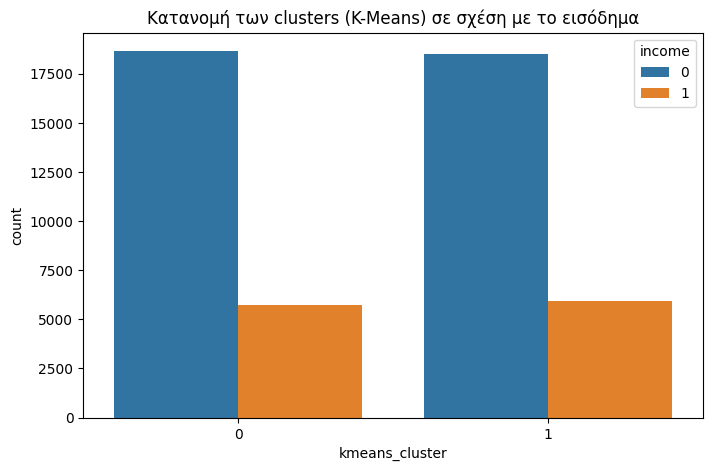

In [7]:
# Οπτικοποίηση της κατανομής των clusters σε σχέση με το εισόδημα
plt.figure(figsize=(8, 5))
sns.countplot(x=adult["kmeans_cluster"], hue=adult["income"])
plt.title("Κατανομή των clusters (K-Means) σε σχέση με το εισόδημα")
plt.show()

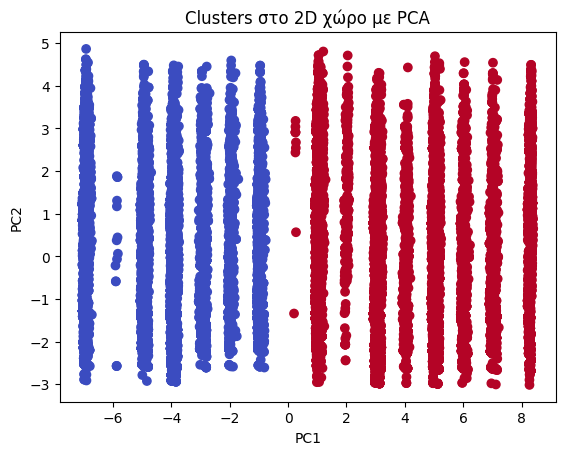

In [8]:
# PCA για μείωση των διαστάσεων σε 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
adult["pca_1"] = X_pca[:, 0]
adult["pca_2"] = X_pca[:, 1]

plt.scatter(adult["pca_1"], adult["pca_2"], c=adult["kmeans_cluster"], cmap="coolwarm")
plt.title("Clusters στο 2D χώρο με PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [9]:
# Αξιολόγηση της συσταδοποίησης με τον δείκτη ARI
ari_kmeans = adjusted_rand_score(y_true, adult["kmeans_cluster"])
print(f"ARI για K-Means: {ari_kmeans}")

ARI για K-Means: 3.934320644783281e-05


### Συσταδοποίηση με **BIRCH**

In [10]:
# Εφαρμογή Birch clustering
birch = Birch(n_clusters=2, threshold=1.5)
adult["birch_cluster"] = birch.fit_predict(X) # ενσωμάτωση των clusters στο dataset

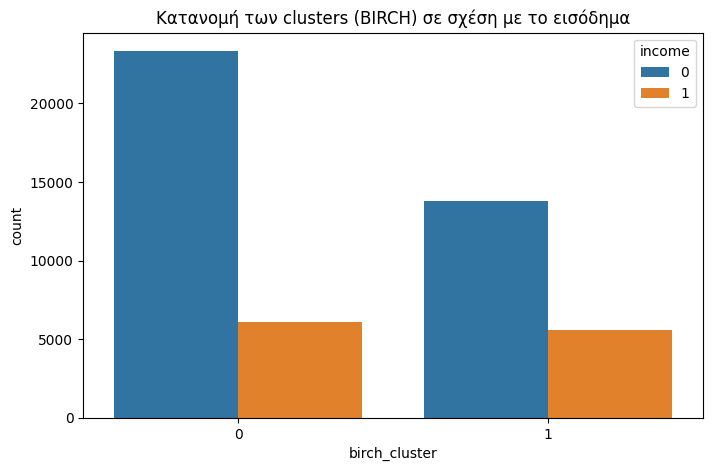

In [11]:
# Οπτικοποίηση της κατανομής των clusters σε σχέση με το εισόδημα
plt.figure(figsize=(8, 5))
sns.countplot(x=adult["birch_cluster"], hue=adult["income"])
plt.title("Κατανομή των clusters (BIRCH) σε σχέση με το εισόδημα")
plt.show()

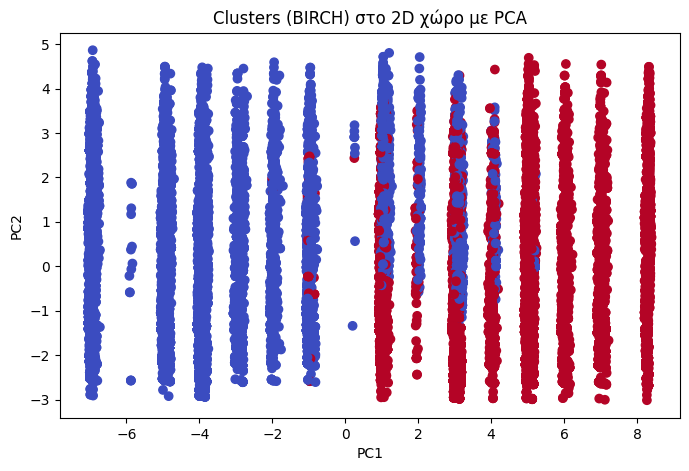

In [12]:
# Οπτικοποίηση των clusters μετά από PCA
plt.figure(figsize=(8, 5))
plt.scatter(adult["pca_1"], adult["pca_2"], c=adult["birch_cluster"], cmap="coolwarm")
plt.title("Clusters (BIRCH) στο 2D χώρο με PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [13]:
# Αξιολόγηση της συσταδοποίησης με τον δείκτη ARI
ari_birch = adjusted_rand_score(y_true, adult["birch_cluster"])
print(f"ARI για BIRCH: {ari_birch}")

ARI για BIRCH: 0.02317295620842845


### Οπτικοποίηση στον 3D χώρο

In [14]:
# Χρήση των PC1, PC2, PC3 για καλύτερη απεικόνιση των clusters
X_pca_3d = adult[["pc1", "pc2", "pc3"]]

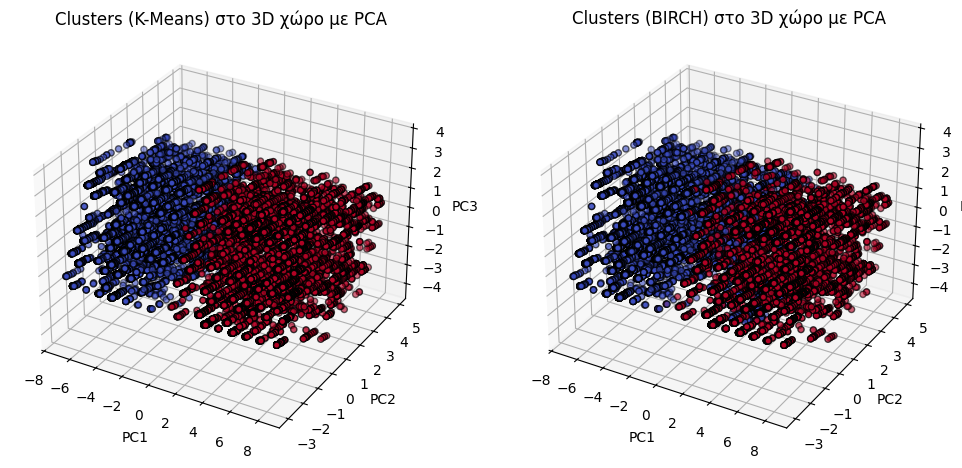

In [15]:
# Δημιουργία καμβά με δύο υπο-γραφήματα
fig = plt.figure(figsize=(12, 6))

# Πρώτο subplot για τον K-Means
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_pca_3d["pc1"], X_pca_3d["pc2"], X_pca_3d["pc3"],
            c=adult["kmeans_cluster"], cmap="coolwarm", edgecolor='k')
ax1.set_title("Clusters (K-Means) στο 3D χώρο με PCA")
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
ax1.set_zlabel("PC3")

# Δεύτερο subplot για τον BIRCH
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_pca_3d["pc1"], X_pca_3d["pc2"], X_pca_3d["pc3"],
            c=adult["birch_cluster"], cmap="coolwarm", edgecolor='k')
ax2.set_title("Clusters (BIRCH) στο 3D χώρο με PCA")
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")
ax2.set_zlabel("PC3")

plt.show() # εμφάνιση τελικού γραφήματος